# Plot band structure

<p style="color:gray;"><b>Ruihao QIU -- qiuruihao@gmail.com</b></p>

This script is to plot band structure without projecting to different orbits.

Input file: PROCAR, OUTCAR

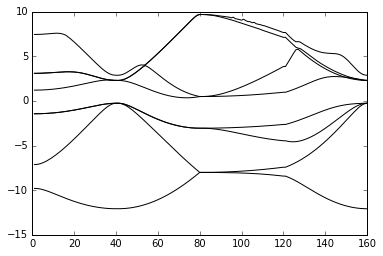

In [2]:
#--------------------------------------------------------------------------------------------
# Import operator numpy and matplotlib
#--------------------------------------------------------------------------------------------
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import array as npa

#--------------------------------------------------------------------------------------------
# Define a find_str() function
# Notice, the string should be the only one in the whole text.
#--------------------------------------------------------------------------------------------
def find_str(str, arr):
    line = 0
    for ln in arr:
        line = line + 1
        if str in ln:
            return(line-1)
            break

#--------------------------------------------------------------------------------------------
# Read data from OUTCAR
#--------------------------------------------------------------------------------------------
file_1 = open ('OUTCAR', 'r')
out = [line.split() for line in file_1]
file_1.close()

lf = find_str("E-fermi", out)
Ef = float(out[lf][2])                         # Fermi level
lk = find_str("NKPTS", out)
nk = int(out[lk][3])                           # Number of K-point
nb = int(out[lk][-1])                          # Number of bands

#--------------------------------------------------------------------------------------------
# Get band structure data from PROCAR
# Add the high symmetry points as the x-axis as you are interested.
#--------------------------------------------------------------------------------------------
file_2 = open ('PROCAR', 'r')
band = [line.split() for line in file_2]
file_2.close()

eng = npa([float(band[j][4]) for j, ln in enumerate(band) if "energy" in ln])
data = np.reshape(eng, (nk,nb)).T-Ef

#--------------------------------------------------------------------------------------------
# Plot the band
#--------------------------------------------------------------------------------------------
x = np.arange(1,nk+1)
for i in range(nb):
    plt.plot(x,data[i],'k-')
plt.show()